In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.impute import KNNImputer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [23]:
pd.set_option('display.max_columns', None)

In [24]:
df_booking_hotels = pd.read_csv('../input/hotel-booking-demand/hotel_bookings.csv')
df_booking_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [25]:
print(f"This dataset has {df_booking_hotels.shape[0]} rows and {df_booking_hotels.shape[1]} columns")

This dataset has 119390 rows and 32 columns


In [26]:
df_booking_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


El dataset proporciona información sobre reservas de hoteles y contiene las siguientes variables:

1. **hotel**: Categórica. Tipo de hotel reservado (resort hotel o city hotel). La mayoría de las reservas son para hoteles de la ciudad (City Hotel: 79,330 registros) en comparación con los resorts (Resort Hotel: 40,060 registros).

2. **is_canceled**: Numérica. Indica si la reserva fue cancelada (1) o no (0).

3. **lead_time**: Numérica. Número de días entre la fecha de reserva y la fecha de llegada.

4. **arrival_date_year**: Numérica. Año de llegada.

5. **arrival_date_month**: Categórica. Mes de llegada. La mayoría de las reservas se realizan en agosto (13,877 registros), julio (12,661 registros) y mayo (11,791 registros). Los meses con menos reservas son enero (5,929 registros), diciembre (6,780 registros) y noviembre (6,794 registros).

6. **arrival_date_week_number**: Numérica. Número de la semana del año de llegada.

7. **arrival_date_day_of_month**: Numérica. Día del mes de llegada.

8. **stays_in_weekend_nights**: Numérica. Número de noches de fin de semana.

9. **stays_in_week_nights**: Numérica. Número de noches entre semana.

10. **adults**: Numérica. Número de adultos.

11. **children**: Numérica. Número de niños.

12. **babies**: Numérica. Número de bebés.

13. **meal**: Categórica. Tipo de comida reservada. La mayoría de las reservas se realizaron con alojamiento y desayuno (BB: 92,310 registros).

14. **country**: Categórica. País de origen del huésped. La mayoría de los huéspedes provienen de Portugal (PRT: 48,590 registros), seguido del Reino Unido (GBR: 12,129 registros) y Francia (FRA: 10,415 registros).

15. **market_segment**: Categórica. Segmento de mercado de la reserva. La mayoría de las reservas provienen de agencias de viajes en línea (Online TA: 56,477 registros).

16. **distribution_channel**: Categórica. Canal de distribución de la reserva. La mayoría de las reservas se realizaron a través de agencias de viajes/touroperadores (TA/TO: 97,870 registros).

17. **is_repeated_guest**: Numérica. Indica si el huésped es un cliente repetido (1) o no (0).

18. **previous_cancellations**: Numérica. Número de cancelaciones previas por el cliente.

19. **previous_bookings_not_canceled**: Numérica. Número de reservas previas no canceladas por el cliente.

20. **reserved_room_type**: Categórica. Tipo de habitación reservada.

21. **assigned_room_type**: Categórica. Tipo de habitación asignada.

22. **booking_changes**: Numérica. Número de cambios realizados en la reserva.

23. **deposit_type**: Categórica. Tipo de depósito realizado. La mayoría de las reservas se realizaron sin depósito (No Deposit: 104,641 registros).

24. **agent**: Numérica. ID del agente que realizó la reserva.

25. **company**: Numérica. ID de la empresa asociada a la reserva.

26. **days_in_waiting_list**: Numérica. Número de días en la lista de espera.

27. **customer_type**: Categórica. Tipo de cliente (transitorios, repetidos, etc.). La mayoría de los clientes son transitorios (Transient: 89,613 registros).

28. **adr**: Numérica. Tarifa diaria promedio.

29. **required_car_parking_spaces**: Numérica. Número de plazas de aparcamiento requeridas.

30. **total_of_special_requests**: Numérica. Número de peticiones especiales realizadas.

31. **reservation_status**: Categórica. Estado de la reserva (cancelada, check-out, etc.). La mayoría de las reservas están marcadas como check-out (75,166 registros).

32. **reservation_status_date**: Categórica. Fecha en la que se actualizó el estado de la reserva.

<Axes: xlabel='hotel'>

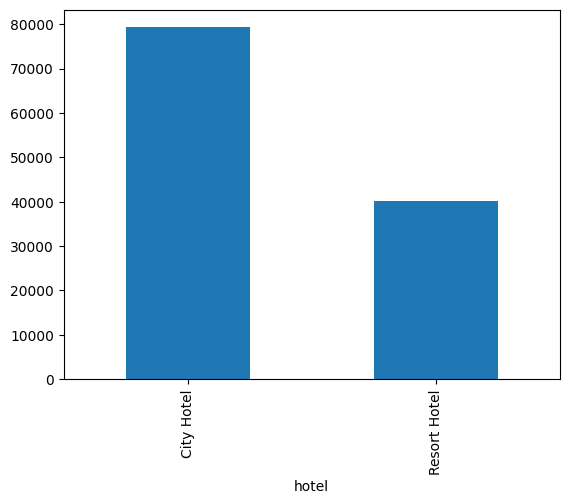

In [27]:
df_booking_hotels.hotel.value_counts().plot(kind='bar')

<Axes: xlabel='meal'>

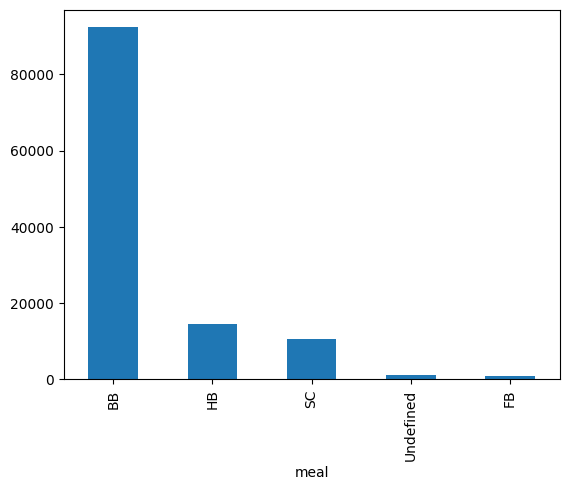

In [28]:
df_booking_hotels.meal.value_counts().plot(kind='bar')

<Axes: xlabel='market_segment'>

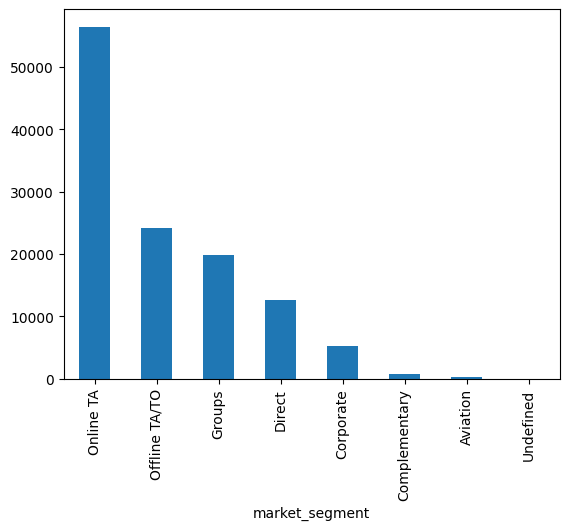

In [29]:
df_booking_hotels.market_segment.value_counts().plot(kind='bar')

<Axes: xlabel='distribution_channel'>

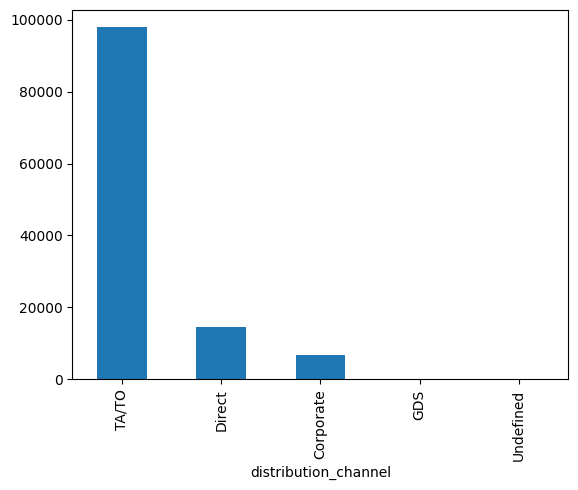

In [30]:
df_booking_hotels.distribution_channel.value_counts().plot(kind='bar')

<Axes: xlabel='deposit_type'>

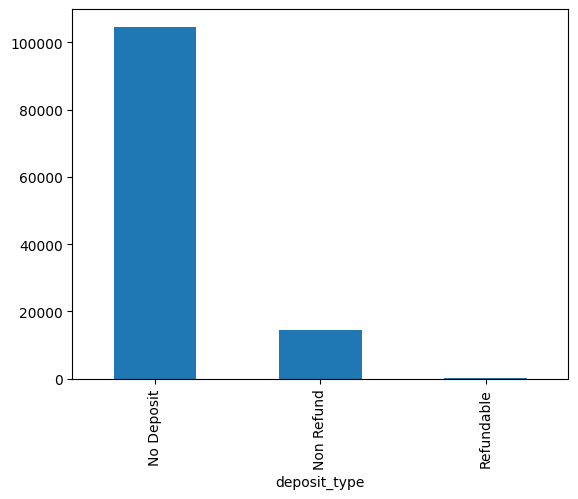

In [31]:
df_booking_hotels.deposit_type.value_counts().plot(kind='bar')

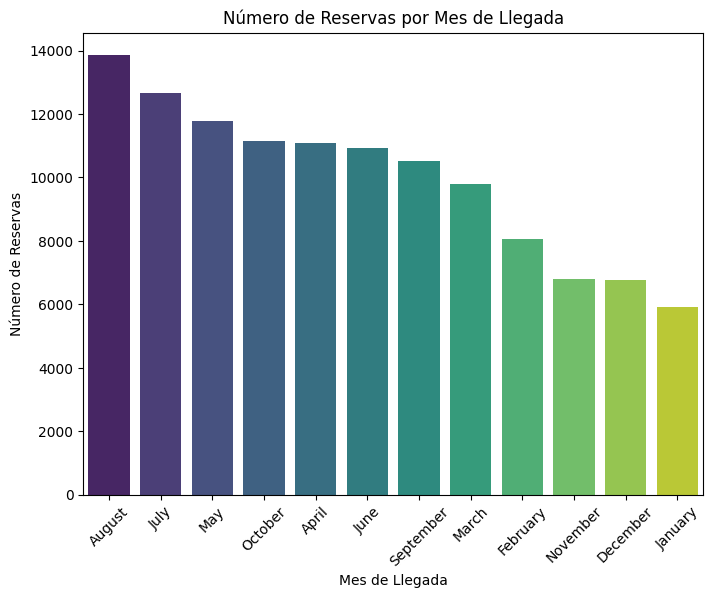

In [32]:
# df_booking_hotels.groupby('arrival_date_month').size().sort_values(ascending=False).plot(kind='bar')
monthly_booking_counts = df_booking_hotels.groupby('arrival_date_month').size().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_booking_counts.index, y=monthly_booking_counts.values, palette='viridis')
plt.title('Número de Reservas por Mes de Llegada')
plt.xlabel('Mes de Llegada')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.show()

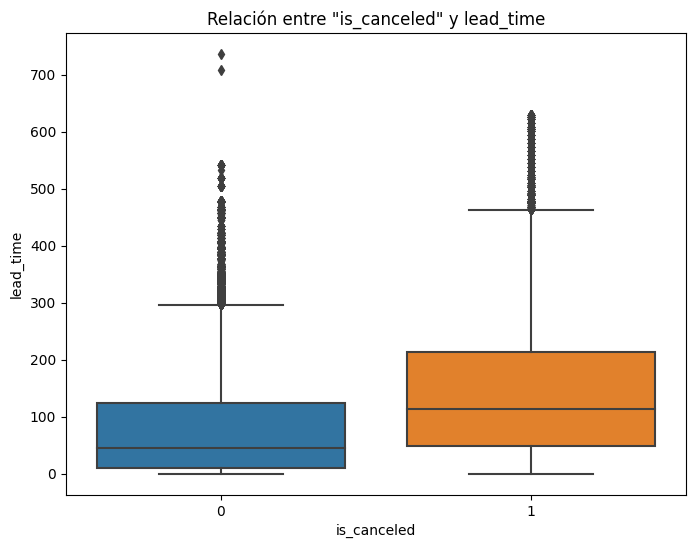

---------------------------------------------------------------------------------------------------------------


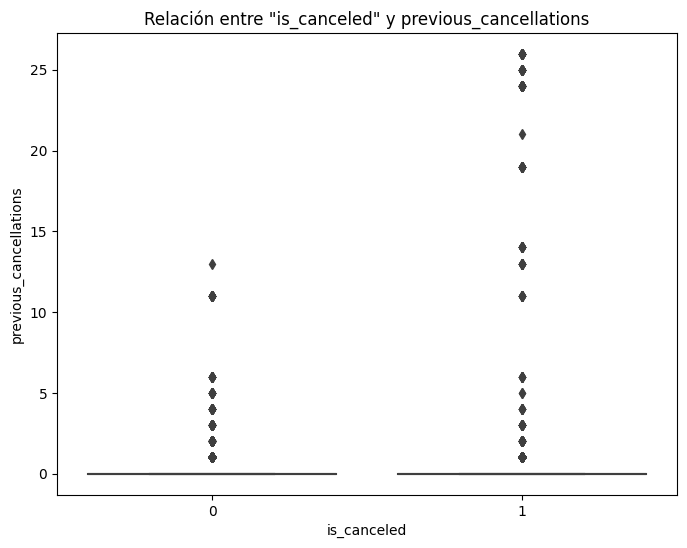

---------------------------------------------------------------------------------------------------------------


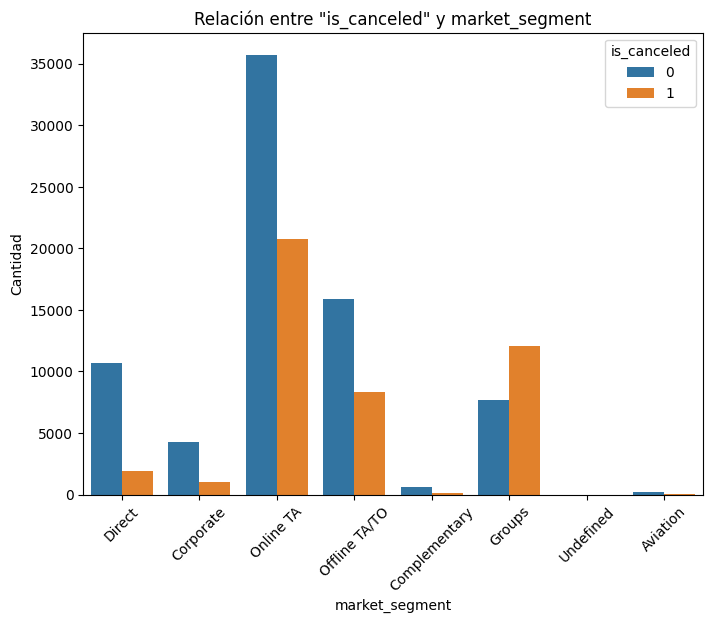

---------------------------------------------------------------------------------------------------------------


In [40]:
variables_to_relate = [
    "lead_time", 
    "previous_cancellations", 
    "market_segment"
]

for variable in variables_to_relate:
    plt.figure(figsize=(8,6))
    if df_booking_hotels[variable].dtype == 'object':
        sns.countplot(data=df_booking_hotels, x=variable, hue='is_canceled')
        plt.title(f'Relación entre "is_canceled" y {variable}')
        plt.xlabel(variable)
        plt.ylabel('Cantidad')
        plt.legend(title='is_canceled')
        plt.xticks(rotation=45)
    else:
        sns.boxplot(data=df_booking_hotels, x='is_canceled', y=variable)
        plt.title(f'Relación entre "is_canceled" y {variable}')
        plt.xlabel('is_canceled')
        plt.ylabel(variable)
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------")